In [27]:
import georinex as gr
import time
import pickle
import numpy as np
from gnsstimetrans import utctoweekseconds
from gpspos import gpspos_ecef, correctPosition


def SellectSystem(all_sat, system):
    system_letter = {
        'GPS': "G",
        'GLONASS': "R",
        'Beidou': "C",
        'Galileo': "E",
    }
    letter = system_letter.get(system, None)

    all_sat = np.array(all_sat)
    want_sat = []
    for i in range(len(all_sat)):
        if all_sat[i][0] == letter:
            want_sat = np.append(want_sat, all_sat[i])
    return want_sat


if __name__ == '__main__':
    # load observation
    obs = gr.load('data/20200384.21o')
    # pickle.dump(obs, open('data/INSA002mA_21o_temp.txt', 'wb'))
    # obs = pickle.load(open('data/INSA003mA_21o_temp.txt', 'rb'))
    # print('finished')
    # end = time.clock()
    # print(end - start)

    # load correspond ephemeris
    epoch_first = str(np.array(obs.time[0]))[0:19]
    print(epoch_first)
    epoch_last = str(np.array(obs.time[-1]))[0:19]
    print(epoch_last)
    eph = gr.load('data/20200384.21n', tlim=[epoch_first, epoch_last])
    print("init obs eph")
    # list all available satellites
    GPS = SellectSystem(eph.sv, 'GPS')
    print('\nAvailable satellite:\n', GPS)
    P_obs = np.zeros([len(GPS), 1])
    P_computed = np.zeros([len(GPS), 1])
    A = np.zeros([len(GPS), 4])
    delta_P = np.zeros([len(GPS), 1])
    A[:, 3] = 299792458
    sat_pos = np.zeros([len(GPS), 3])
    tList = []
    
    for minute in range(0,60,2):
        second = 0
        tList.append(f"2021-01-02T12:{minute}:{second}")

    GPS_row = []
    for n in range(len(GPS)):
        GPS_row_singleSat = []
        for t in tList:
            # print('Use satellite:', GPS[n])
            ## calculate the position of satellite GPS_n
            GPS_n = eph.sel(sv=GPS[n]).dropna(dim='time', how='all')
            soW = utctoweekseconds(t, 0)[1]
            # print('Time of the week:', soW)
            GPS_n_pos_raw = gpspos_ecef(GPS_n, soW)
            GPS_row_singleSat.append(GPS_n_pos_raw)
            # print('\nPosition of satellite', GPS[n], ':\n', GPS_n_pos)
            print(GPS_n_pos_raw)
        GPS_row.append(GPS_row_singleSat)

2021-01-02T12:00:00
2021-01-02T12:59:59
init obs eph

Available satellite:
 ['G05' 'G06' 'G07' 'G08' 'G09' 'G13' 'G14' 'G15' 'G16' 'G18' 'G23' 'G24'
 'G28' 'G30']
[25155483.14402398 -3547670.35627412  7917488.68523686]
[25272521.20855472 -3506221.84641824  7564307.90178104]
[25384512.17122    -3465978.07558076  7208822.87523214]
[25491412.3886455  -3426859.81647775  6851142.53907143]
[25593180.77834232 -3388786.83487787  6491376.42737931]
[25689778.84293177 -3351677.9531861   6129634.64135124]
[25781170.69266123 -3315451.11462347  5766027.81572533]
[25867323.06619897 -3280023.44795878  5400667.08513134]
[25948205.34969699 -3245311.33274473  5033664.05037133]
[26023789.5941116  -3211230.46501673  4665130.74464161]
[26094050.53077353 -3177695.92340619  4295179.59970588]
[26158965.58519947 -3144622.23562375  3923923.41202917]
[26218514.88913929 -3111923.44526672  3551475.30888235]
[26272681.29085309 -3079513.17890464  3177948.71442673]
[26321450.36361466 -3047304.7133971   2803457.3157878

[ 1.57051872e+07 -1.83505688e+03  2.12994877e+07]
[15817308.27528605   305700.73853321 21216098.07677749]
[15931108.0193005    611188.33779276 21126139.01001465]
[16046524.07257586   914527.75604936 21029639.53534925]
[16163491.98678288  1215620.65286081 20926630.70148272]
[16281945.273997    1514370.39165658 20817145.5803644 ]
[16401815.4528097   1810682.09796123 20701219.25519407]
[16523032.09589248  2104462.71632954 20578888.80777689]
[16645522.8789776   2395621.06595854 20450193.30523697]
[16769213.63121968  2684067.89493501 20315173.78609591]
[16894028.38690019  2969715.93308568 20173873.24572309]
[17019889.43843732  3252479.94339101 20026336.62116452]
[17146717.39066127  3532276.77193141 19872610.77535726]
[17274431.21631549  3809025.39633107 19712744.48073693]
[17402948.31274292  4082646.97266654 19546788.40224557]
[17532184.55971527  4353064.88081188 19374795.07974766]
[17662054.37836351  4620204.76818722 19196818.90986221]
[17792470.79116573  4883994.59188578 19012916.12721891

[ -7192899.79734352 -14739924.29865831  20871174.02694197]
[ -6873370.91722645 -14740753.48238108  20977453.22787863]
[ -6552293.24281226 -14743794.13056636  21077294.64936362]
[ -6229779.5433892  -14749071.45974916  21170667.36236747]
[ -5905943.34800301 -14756608.19291659  21257542.42324442]
[ -5580898.8754647  -14766424.54155293  21337892.8829879 ]
[ -5254760.96389039 -14778538.18949253  21411693.79587137]
[ -4927644.99981894 -14792964.27859323  21478922.2274713 ]
[ -4599666.84695864 -14809715.39623963  21539557.26206975]
[ -4270942.77460855 -14828801.56468663  21593580.00943355]
[ -3941589.38580632 -14850230.23225006  21640973.6109678 ]
[ -3611723.54524915 -14874006.26635204  21681723.2452414 ]
[ -3281462.30703805 -14900131.94842588  21715816.13288244]
[ -2950922.8422959  -14928606.97068456  21743241.54084165]
[ -2620222.36670617 -14959428.43475605  21763990.7860221 ]
[ -2289478.06802502 -14992590.85218631  21778057.23827382]
[ -1958807.03361317 -15028086.14681074  21785436.3227518

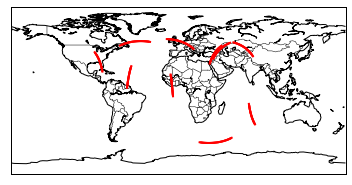

In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt 
from geodesy import ecef2llh
map = Basemap() 
map.drawmapboundary() 
map.drawcoastlines() 
map.drawcountries() 

GPS_n_pos_raw_part = GPS_row[:]

for n in range(len(GPS)):
    lastPos = (0,0,0)
    GPS_sv = GPS_n_pos_raw_part[n]
    for item in GPS_sv:
        Pos = tuple(item)
        if lastPos[0]>0:
            start_lat,start_lon,_ = ecef2llh(lastPos)
            end_lat,end_lon,_ = ecef2llh(Pos)
            map.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=2,color = "red")
        lastPos = Pos

plt.show() 

In [19]:
from geodesy import ecef2llh

In [36]:
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout
# from matplotlib.backends.backend_qtagg import FigureCanvas, NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt

from matplotlib.backends.qt_compat import QtCore, QtWidgets
if QtCore.qVersion() >= "5.":
    from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)
else:
    from matplotlib.backends.backend_qt4agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)

plotfig


SystemExit: 0

c:\users\lixin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


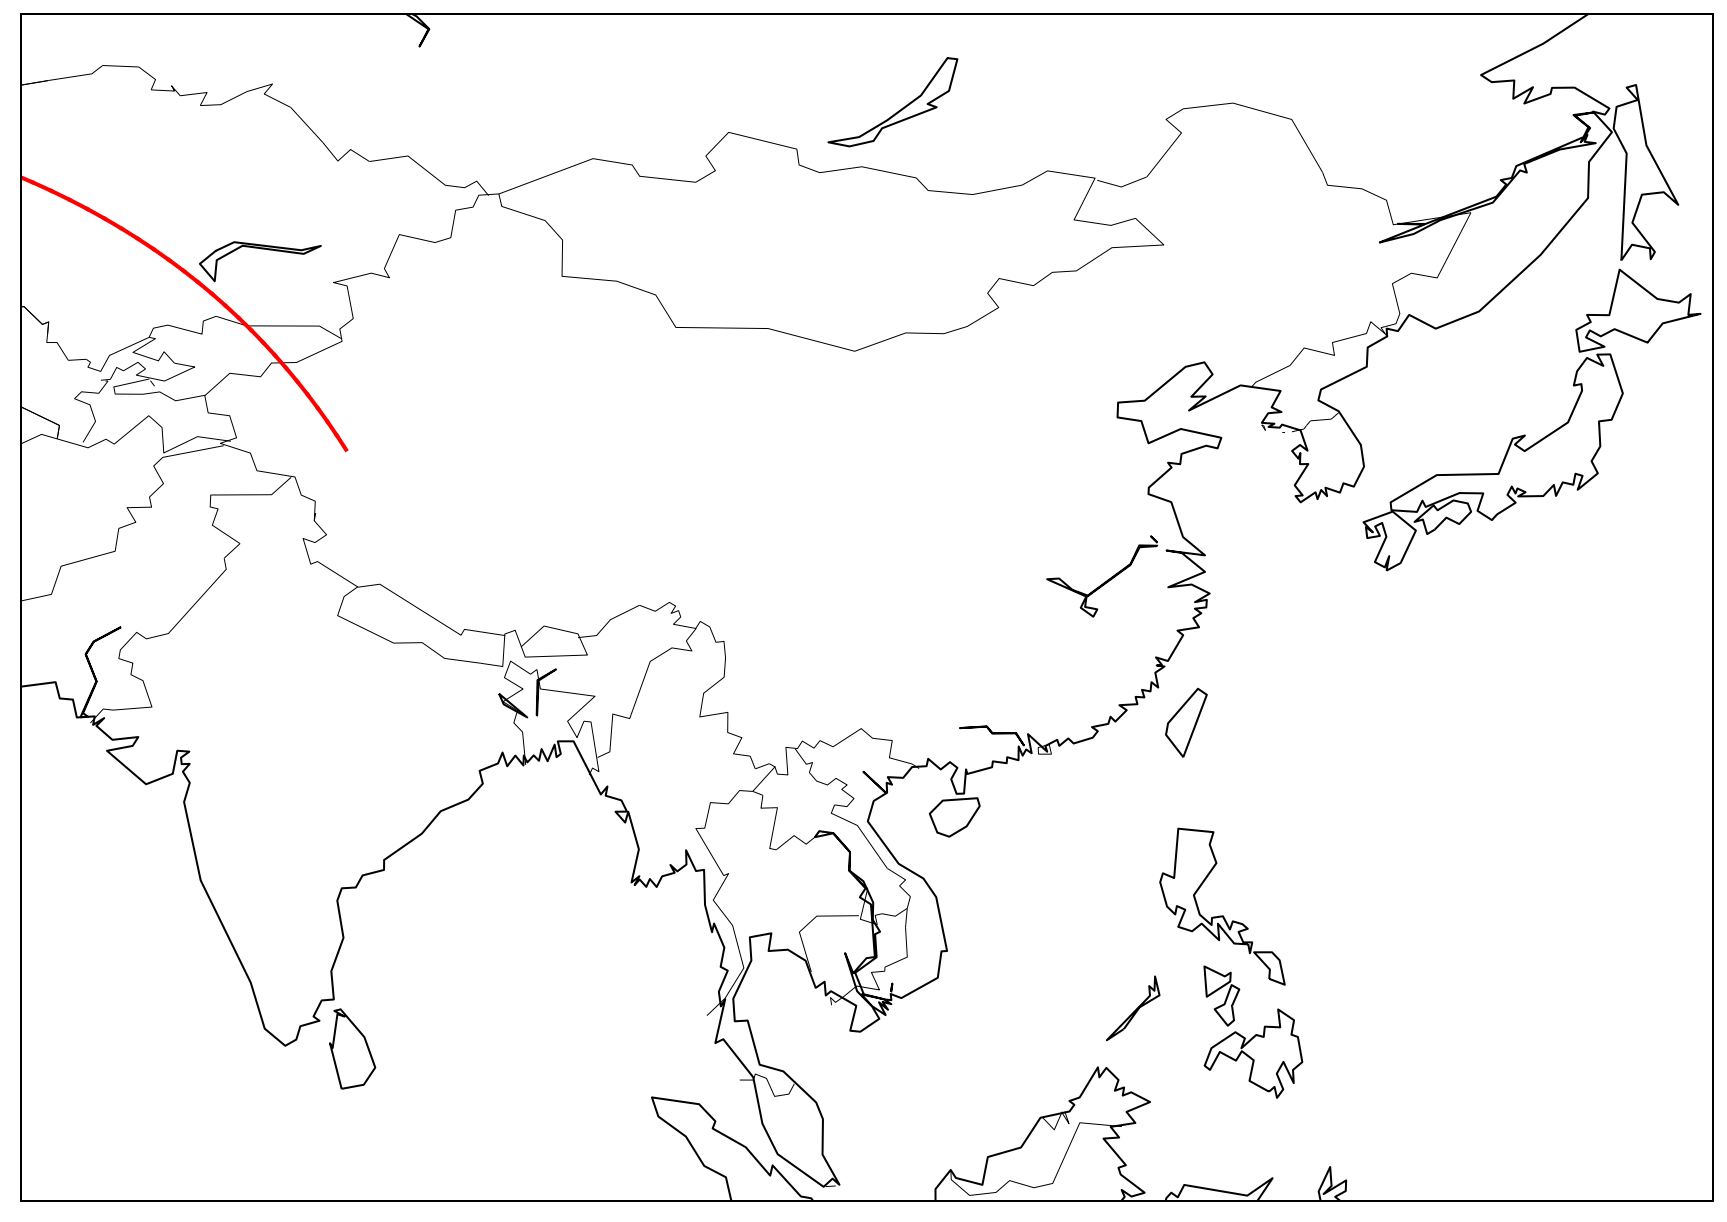

In [37]:

from matplotlib.figure import Figure

class MainWin(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("matplotlib embeded in Python Qt with figure toolbar")
        self.initUI()
        self.plotfig()
        
    def initUI(self): 
        self.fig = plt.figure()                                                   #创建figure对象
        self.canvas=FigureCanvas(self.fig)                              #创建figure画布
        self.figtoolbar=NavigationToolbar(self.canvas, self)     #创建figure工具栏
       
        vlayout=QVBoxLayout()
        vlayout.addWidget(self.canvas)                                 #画布添加到窗口布局中
        vlayout.addWidget(self.figtoolbar)                             #工具栏添加到窗口布局中
        self.setLayout(vlayout)
        
    def plotfig(self):                                                            #绘制matplot图形
        print("plotfig")
#         ax = self.fig.subplots()
        map = Basemap() 
        map.drawmapboundary() 
        map.drawcoastlines() 
        map.drawcountries() 

        GPS_n_pos_raw_part = GPS_row[:]

        for n in range(len(GPS)):
            lastPos = (0,0,0)
            GPS_sv = GPS_n_pos_raw_part[n]
            for item in GPS_sv:
                Pos = tuple(item)
                if lastPos[0]>0:
                    start_lat,start_lon,_ = ecef2llh(lastPos)
                    end_lat,end_lon,_ = ecef2llh(Pos)
                    map.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=2,color = "red")
                lastPos = Pos

#         plt.show() 
#         print(self.fig)
#         ax = plt.axes(projection='3d')
#         GPS_n_pos_raw_part = GPS_row[:]
#         for n in range(len(GPS)):
#             x = [item[0] for item in GPS_n_pos_raw_part[n]]
#             y = [item[1] for item in GPS_n_pos_raw_part[n]]
#             z = [item[2] for item in GPS_n_pos_raw_part[n]]
#     #         ax.plot(t,np.sin(t))
#             ax.plot3D(x, y, z, 'gray')
#         # plot earth
#         xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000*10, dense=40)
#         ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
        
#         ax.autoscale_view()


app=QApplication(sys.argv)
win = MainWin()
win.show()
sys.exit(app.exec())

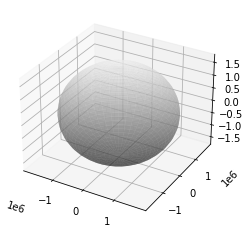

In [16]:
# x = np.outer(np.linspace(-3474.8/2*1000, 3474.8/2*1000, 30), np.ones(30))
# x
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# #求向量积(outer()方法又称外积)
# # x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
# #矩阵转置
# y = x.copy().T 
# #数据z
# z = (x ** 2 + y ** 2)
# #绘制曲面图
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # 调用plot_surface()函数
# ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
# ax.set_title('Surface plot')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np


def hua_qiu(x, y, z, r, dense):
    """
        圆心坐标 半径 稠密程度
    """
    t = np.linspace(0, np.pi * 2, dense)
    s = np.linspace(0, np.pi, dense)
    t, s = np.meshgrid(t, s)             # 生成稠密网格点
    x = x + r * np.sin(s) * np.cos(t)    # 球面坐标公式
    y = y + r * np.sin(s) * np.sin(t)
    z = z + r * np.cos(s)
    return x, y, z


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy, zz = hua_qiu(x=0, y=0, z=0, r=3474.8/2*1000, dense=40)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='gray', alpha=0.5) # cmap='rainbow',
plt.show()


In [8]:
GPS_n_pos_raw

array([  8933810.29115592,  14323611.22254058, -20429755.64937826])

In [41]:
eph.Toe

<xarray.DataArray 'Toe' (time: 35, sv: 32)>
array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [489600.,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [    nan, 597600.,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,      0.,     nan]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-31T02:00:00 ... 2021-01-03
  * sv       (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'